In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
import numpy as np
import random
%matplotlib inline

train_positive_dir=r"J:\ANA_Training\TestPics\Pics1\Train\Possitive"
train_negative_dir=r"J:\ANA_Training\TestPics\Pics1\Train\Negative"
train_dir=r"J:\ANA_Training\TestPics\Pics1\Train"
train_positive_paths=os.listdir(train_positive_dir)
train_negative_paths=os.listdir(train_negative_dir)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
history = model.fit_generator(
      train_generator,
      steps_per_epoch=5,  
      epochs=100,
      verbose=2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               3211776   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

[[0.9999964]] J:\ANA_Training\TestPics\Pics1\Train\Possitive\SP119.jpg


(1, 31, 31, 16)

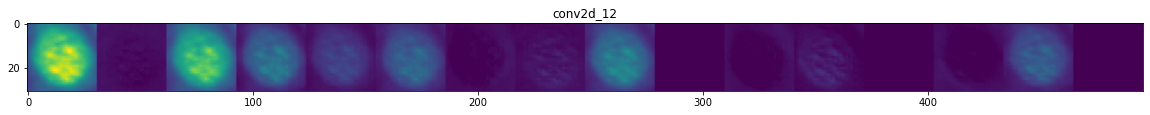

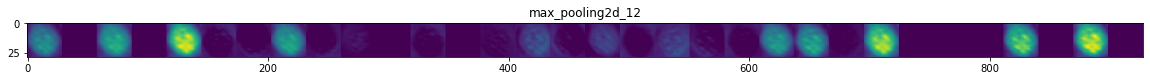

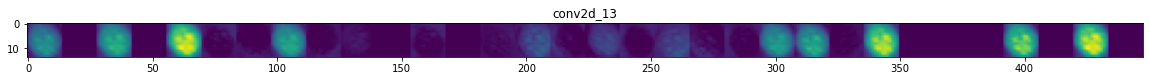

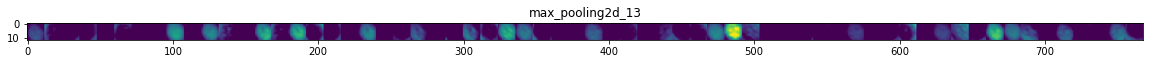

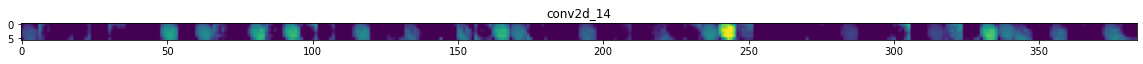

In [30]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
positive_paths=[os.path.join(train_positive_dir, fname) 
                for fname in train_positive_paths]
negative_paths=[os.path.join(train_negative_dir, fname) 
                for fname in train_negative_paths]
img_path=random.choice(positive_paths + negative_paths)
img = load_img(img_path, target_size=(64, 64))
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  
x/=255
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1] 
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x*=255
      '''
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      '''
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
print(successive_feature_maps[-1],img_path)
successive_feature_maps[0].shape

[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.00045843]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]

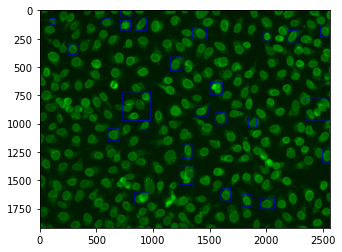

In [54]:
import cv2 as cv
path=r"J:\ANA_Training\TestPics\Pics2\Origin.png"
outpath1=r"J:\python\ModualPrictice\Tensorflow\Test1.jpg"
outpath2=r"J:\python\ModualPrictice\Tensorflow\Test2.jpg"

img = cv.imread(path)
out = img.copy()
out = out[:,:,1]
erode_kernel = np.ones((5,5), np.uint8)
out = cv.GaussianBlur(out, (3,3), 1)
out = cv.dilate(out, erode_kernel, iterations=5)
thresh, out = cv.threshold(out, 100, 255, cv.THRESH_BINARY)

findout=np.copy(out)
contours, hierarchy = cv.findContours(findout,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE) 

imgcontours=np.copy(img)
imgcontours=cv.drawContours(imgcontours,contours,-1,(0,0,255),3)
cv.imwrite(outpath1,imgcontours)

pos=[]
sizethreshold=50
for i in range(len(contours)):
    pos.append([np.min(contours[i][:,:,0]),np.min(contours[i][:,:,1]),np.max(contours[i][:,:,0]),np.max(contours[i][:,:,1])])

recimg=np.copy(img)
for i in range(len(contours)):
    if ((pos[i][2]-pos[i][0])>=sizethreshold) and ((pos[i][3]-pos[i][1])>=sizethreshold):
        temimg=img[pos[i][1]:pos[i][3],pos[i][0]:pos[i][2],:]
        temimg=cv.resize(temimg,(64,64)).reshape(1,64,64,3)
        print(model.predict(temimg))
        if model.predict(temimg)>=0.5:
            recimg=cv.rectangle(recimg, (pos[i][0],pos[i][1]), (pos[i][2],pos[i][3]),(0,0,255),3)
cv.imwrite(outpath2,recimg)  
plt.imshow(recimg)


In [58]:
import cv2 as cv
path=r"J:\ANA_Training\TestPics\Pics2\Origin.png"
outpath1=r"J:\python\ModualPrictice\Tensorflow\Test1.jpg"
outpath2=r"J:\python\ModualPrictice\Tensorflow\Test2.jpg"
thresholds=range(256)
loss=[]
img = cv.imread(path)
out = img.copy()
out = out[:,:,1]
erode_kernel = np.ones((5,5), np.uint8)
out = cv.GaussianBlur(out, (3,3), 1)
out = cv.dilate(out, erode_kernel, iterations=5)
sizethreshold=50
poses=[]
for threshold in thresholds:
    temout=np.copy(out)
    abc, temout = cv.threshold(temout, threshold, 255, cv.THRESH_BINARY)
    findout=np.copy(temout)
    contours, hierarchy = cv.findContours(findout,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE) 
    imgcontours=np.copy(img)
    imgcontours=cv.drawContours(imgcontours,contours,-1,(0,0,255),3)
    cv.imwrite(outpath1,imgcontours)
    pos=[]
    for i in range(len(contours)):
        pos.append([np.min(contours[i][:,:,0]),np.min(contours[i][:,:,1]),np.max(contours[i][:,:,0]),np.max(contours[i][:,:,1])])
    recimg=np.copy(img)
    s=0.0
    for i in range(len(contours)):
        if ((pos[i][2]-pos[i][0])>=sizethreshold) and ((pos[i][3]-pos[i][1])>=sizethreshold):
            temimg=img[pos[i][1]:pos[i][3],pos[i][0]:pos[i][2],:]
            temimg=cv.resize(temimg,(64,64)).reshape(1,64,64,3)
            s+=model.predict(temimg)[0,0]
    print("Threshold=",threshold,"loss=",s)
    loss.append([s,threshold])
    poses.append(pos)

    


Threshold= 0 loss= 0.0
Threshold= 1 loss= 0.0
Threshold= 2 loss= 0.0
Threshold= 3 loss= 0.0
Threshold= 4 loss= 0.0
Threshold= 5 loss= 0.0
Threshold= 6 loss= 0.0
Threshold= 7 loss= 0.0
Threshold= 8 loss= 0.0
Threshold= 9 loss= 0.0
Threshold= 10 loss= 0.0
Threshold= 11 loss= 0.0
Threshold= 12 loss= 0.0
Threshold= 13 loss= 0.0
Threshold= 14 loss= 0.0
Threshold= 15 loss= 0.0
Threshold= 16 loss= 0.0
Threshold= 17 loss= 0.0
Threshold= 18 loss= 0.0
Threshold= 19 loss= 0.0
Threshold= 20 loss= 0.0
Threshold= 21 loss= 0.0
Threshold= 22 loss= 0.0
Threshold= 23 loss= 0.0
Threshold= 24 loss= 0.0
Threshold= 25 loss= 0.0
Threshold= 26 loss= 0.0
Threshold= 27 loss= 0.0
Threshold= 28 loss= 0.0
Threshold= 29 loss= 0.0
Threshold= 30 loss= 0.0
Threshold= 31 loss= 1.0
Threshold= 32 loss= 1.0
Threshold= 33 loss= 2.0
Threshold= 34 loss= 3.0
Threshold= 35 loss= 7.0
Threshold= 36 loss= 10.0
Threshold= 37 loss= 14.0
Threshold= 38 loss= 14.0
Threshold= 39 loss= 17.0
Threshold= 40 loss= 20.0
Threshold= 41 loss= 2

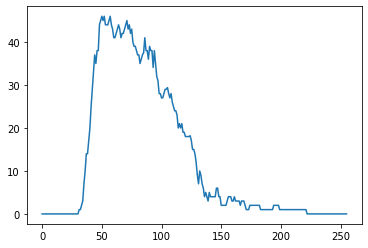

In [68]:
losses=np.array(loss)
losses=losses[:,0]
plt.plot(thresholds,losses)

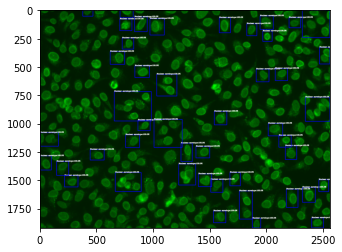

In [84]:
tempos=poses[np.argmax(losses)]
recimg=np.copy(img)
for i in range(len(tempos)):
    temimg=img[tempos[i][1]:tempos[i][3],tempos[i][0]:tempos[i][2],:]
    temimg=cv.resize(temimg,(64,64)).reshape(1,64,64,3)
    temloss=model.predict(temimg)[0,0]
    if ((tempos[i][2]-tempos[i][0])>=50) and ((tempos[i][3]-tempos[i][1])>=50):
        if temloss>=0.5:
            recimg=cv.rectangle(recimg, (tempos[i][0],tempos[i][1]), (tempos[i][2],tempos[i][3]),(0,0,255),3)
            recimg=cv.putText(recimg,'Nuclear envelope:'+ str(round(temloss*100,2))+"%",(tempos[i][0],tempos[i][1]),cv.FONT_HERSHEY_COMPLEX,0.5,(255,255,255),2)

plt.imshow(recimg)

In [85]:
cv.imwrite(outpath2,recimg)

True

In [ ]:
img=cv2.putText(im,'3',(0,40),font,1.2,(255,255,255),2)